In [26]:
import pandas 
import os 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import random
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering, SpectralClustering, MeanShift
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [28]:
dataset = pandas.read_csv('new_dataset.csv')
scores = list(np.array(dataset['Балл']))

In [29]:
names_for_clusterization = list(dataset.drop(['ЛогинОО', 'Балл'], axis=1).columns)
other_names = ['ЛогинОО', 'Балл']

In [30]:
data_for_clust = np.array(dataset[names_for_clusterization]) 

In [31]:
data_not_for_clust = np.array(dataset[other_names]) 

In [38]:
data_for_clust.shape

(11221346, 92)

#### Кластеризация 
#### Будем проверять гипотезы для альфа 0.001, 0.01, 0.05, 0.1, 0.2

##### Случайное создание подвыборки

In [8]:
import random

random.seed(10)

In [9]:
# Создание случайной выборки размера alpha*n, где n- размер сета 
def get_random_samples(alpha):
    
    return random.sample(list(scores),round(len(scores)*alpha))



In [10]:
def get_metrics(f, alpha,  n = 100):

    d_means, d_stds, d_medians =  [], [], [] 
    score_mean, score_stds, score_medians = np.mean(scores), np.std(scores), np.median(scores)
    for i in range(n):
        sample = f(alpha)

        
        d_means.append(abs(1 - (np.mean(sample) / np.mean(scores))))
        d_stds.append(abs(1 - (np.std(sample) / np.std(scores))))
        d_medians.append(abs(1 - (np.median(sample) / np.median(scores))))


    return  np.mean(d_means), np.mean(d_stds), np.mean(d_medians), len(sample)

In [11]:
%%time
get_metrics(get_random_samples, 0.3)

CPU times: total: 29min 35s
Wall time: 31min 8s


(0.00021508226939782936, 0.00020317624836898473, 0.0, 3366404)

In [12]:
%%time 
get_metrics(get_random_samples, 0.1)

CPU times: total: 16min 44s
Wall time: 17min 25s


(0.0003596150664478637, 0.00032898649522587807, 0.0, 1122135)

In [13]:
%%time
get_metrics(get_random_samples, 0.01)

CPU times: total: 10min 37s
Wall time: 11min 4s


(0.0013691729976636846, 0.0013565210626128655, 0.0, 112213)

In [14]:
%%time 
get_metrics(get_random_samples, 0.001)

CPU times: total: 10min 3s
Wall time: 10min 27s


(0.00400181705876228, 0.004464445405501987, 0.0025, 11221)

In [15]:
%%time 
get_metrics(get_random_samples, 0.0001)

CPU times: total: 9min 57s
Wall time: 10min 20s


(0.01302205182588486, 0.01353110640624337, 0.0203125, 1122)

In [16]:
%%time 
get_metrics(get_random_samples, 0.00005)

CPU times: total: 9min 57s
Wall time: 10min 21s


(0.016555626060867995, 0.019644821892904923, 0.02125, 561)

In [17]:
%%time
get_metrics(get_random_samples, 0.00001)

CPU times: total: 9min 51s
Wall time: 10min 16s


(0.049076439418212894, 0.05005851924475268, 0.0653125, 112)

In [18]:
%%time
get_metrics(get_random_samples, 0.000005)

CPU times: total: 9min 39s
Wall time: 10min 6s


(0.06301598179737865, 0.06464917040927794, 0.1046875, 56)

In [19]:
%%time
get_metrics(get_random_samples, 0.000002)

CPU times: total: 9min 41s
Wall time: 10min 8s


(0.10162282488142627, 0.11506100588449147, 0.1525, 22)

In [20]:
%%time
get_metrics(get_random_samples, 0.000001)

CPU times: total: 9min 40s
Wall time: 10min 6s


(0.14180039143566991, 0.1536514836467334, 0.233125, 11)

In [21]:
%%time
get_metrics(get_random_samples, 0.0000005)

CPU times: total: 9min 38s
Wall time: 10min 3s


(0.18638848771252264, 0.21675860712607115, 0.264375, 6)

### PCA

In [12]:
pca = PCA(n_components=2)
trans_data = pca.fit_transform(data_for_clust)

In [201]:
pca.explained_variance_ratio_

array([0.3491326 , 0.17522551])

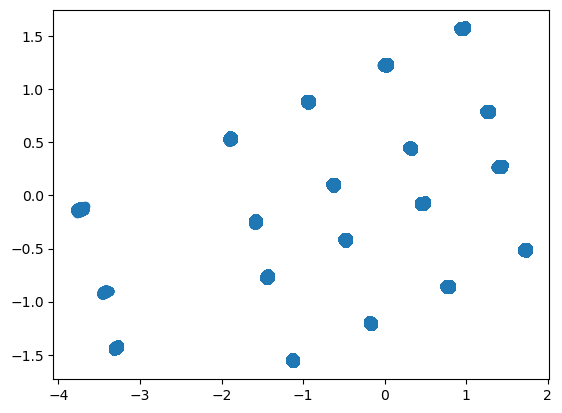

In [13]:
plt.scatter(trans_data[:,0],trans_data[:,1])

###### Можно 19 групп

### K-Means

##### Для k = 19

In [40]:
scores = np.array(dataset['Балл'])

#### Описание кластеров для 7 кластеров

In [44]:
kmeans = KMeans(n_clusters=7, random_state=0,).fit(data_for_clust)
preds = kmeans.predict(data_for_clust)

In [56]:
dist_of_preds = {}
for i in range(7): 
    dist_of_preds[i] = sum(preds == i) / 11221346

In [57]:
dist_of_preds

{0: 0.15142862540732635,
 1: 0.10456945182868436,
 2: 0.11384775052832342,
 3: 0.15053711025397487,
 4: 0.17961784620133806,
 5: 0.17159545744334057,
 6: 0.12840375833701234}

In [84]:
dataset['Класс'].value_counts()

Класс
5    5527165
4    3086470
6    2607711
Name: count, dtype: int64

In [86]:
for i in list(set(preds)):
    print(f'МЕ для кластера с номером {i+1}  = {np.mean(scores[preds==i])}' )
    print(f'СТД для кластера с номером {i+1}  = {np.std(scores[preds==i])}' )
    print(f'Медиана для кластера с номером {i+1}  = {np.median(scores[preds==i])}' )
    print('---------------------------------------------------------------')
        

МЕ для кластера с номером 1  = 13.861824717387197
СТД для кластера с номером 1  = 2.537821836208626
Медиана для кластера с номером 1  = 14.0
---------------------------------------------------------------
МЕ для кластера с номером 2  = 18.6280771426867
СТД для кластера с номером 2  = 5.857029440435759
Медиана для кластера с номером 2  = 20.0
---------------------------------------------------------------
МЕ для кластера с номером 3  = 32.194329660867695
СТД для кластера с номером 3  = 5.274521932094993
Медиана для кластера с номером 3  = 32.0
---------------------------------------------------------------
МЕ для кластера с номером 4  = 32.03000658880472
СТД для кластера с номером 4  = 4.444955531790109
Медиана для кластера с номером 4  = 32.0
---------------------------------------------------------------
МЕ для кластера с номером 5  = 7.177505539419931
СТД для кластера с номером 5  = 2.881768200859208
Медиана для кластера с номером 5  = 7.0
--------------------------------------------

#### 19 кластеров

In [18]:
kmeans = KMeans(n_clusters=19, random_state=0,).fit(data_for_clust)
preds = kmeans.predict(data_for_clust)

C:\Users\isazo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


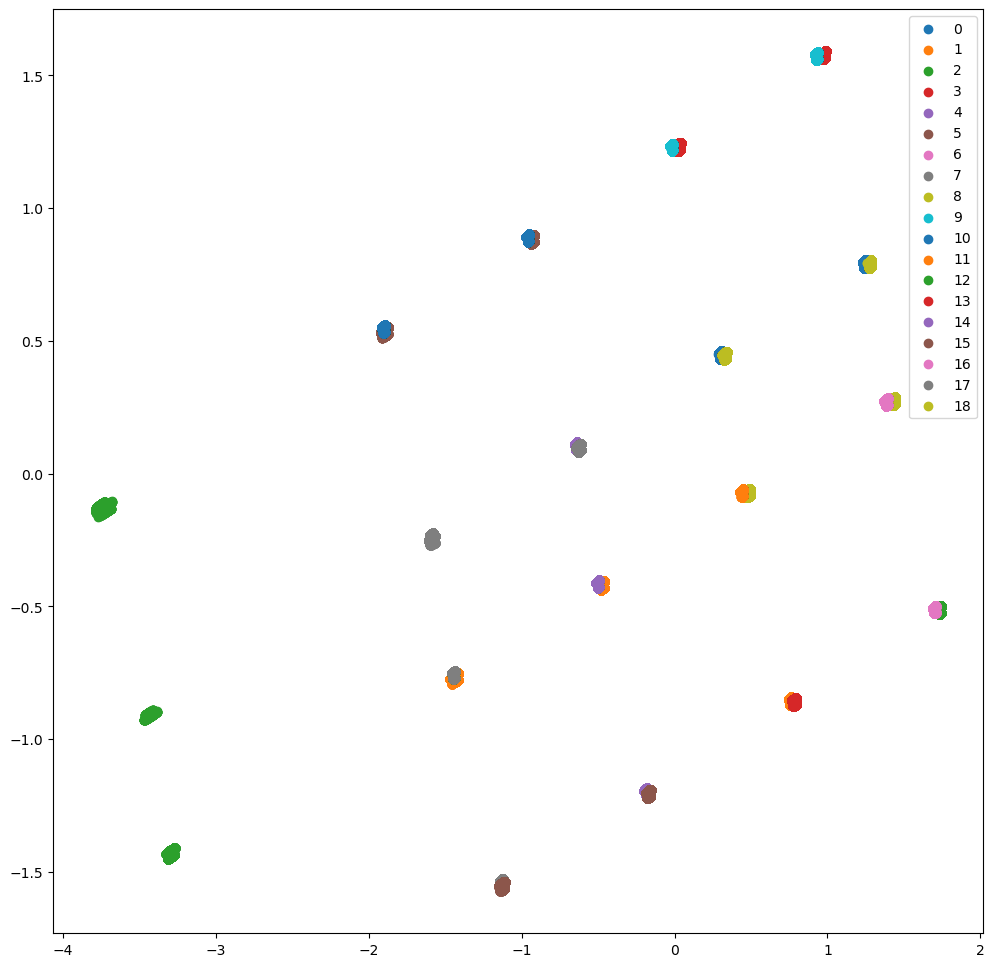

In [19]:
plt.figure(figsize=(12,12))
for i in list(set(preds)):
    
    plt.scatter(trans_data[preds==i,0],trans_data[preds==i,1],label=i)
plt.legend()
plt.show()

In [20]:
dist_of_preds = {}
for i in range(19): 
    dist_of_preds[i] = sum(preds == i) / 11221346

In [21]:
def get_k_means_samples(alpha):

    length = preds.shape[0]
    size_of_sample = round(alpha * length)
    

    sample = []
    
    for i in range(len(list(set(preds)))):

        sample = sample + list(random.sample(list(scores[preds==i]),round((size_of_sample*dist_of_preds[i]))))
        
    if len(sample) == size_of_sample:
        
        return sample
    elif len(sample)<size_of_sample:

        sample = sample + list(random.sample(list(scores), size_of_sample - len(sample)))
        return sample

    else:
        
        sample = sample[0:-(len(sample)-size_of_sample)]
        return sample

        


In [33]:
%%time
get_metrics(get_k_means_samples, 0.3,)

CPU times: total: 34min 38s
Wall time: 36min 34s


(6.92461578815562e-05, 0.00012769137776021288, 0.0, 3366404)

In [34]:
%%time 
get_metrics(get_k_means_samples, 0.1,)

CPU times: total: 18min 20s
Wall time: 19min 11s


(0.0001330913144232393, 0.00026233758906009206, 0.0, 1122135)

In [35]:
%%time
get_metrics(get_k_means_samples, 0.01,)

CPU times: total: 10min 18s
Wall time: 10min 46s


(0.000486159995895008, 0.0009380175242118671, 0.0, 112213)

In [36]:
%%time
get_metrics(get_k_means_samples, 0.001,)

CPU times: total: 9min 35s
Wall time: 9min 59s


(0.001407905419351717, 0.002689342959139164, 0.0, 11221)

In [37]:
%%time
get_metrics(get_k_means_samples, 0.0001)

CPU times: total: 8min 56s
Wall time: 9min 24s


(0.005189973861096826, 0.007805288709507433, 0.0109375, 1122)

In [38]:
%%time
get_metrics(get_k_means_samples, 0.00005)

CPU times: total: 12min 1s
Wall time: 12min 40s


(0.007529851086566507, 0.010176499048302298, 0.01875, 561)

In [39]:
%%time
get_metrics(get_k_means_samples, 0.00001)

CPU times: total: 9min 21s
Wall time: 9min 46s


(0.015369567579023058, 0.024823844566244396, 0.0353125, 112)

In [40]:
%%time 
get_metrics(get_k_means_samples, 0.000005)

CPU times: total: 8min 19s
Wall time: 8min 39s


(0.02416281840909445, 0.03354610185020577, 0.0478125, 56)

In [41]:
%%time 
get_metrics(get_k_means_samples, 0.000002)

CPU times: total: 10min 44s
Wall time: 11min 9s


(0.053483653991416816, 0.0652714853401919, 0.0990625, 22)

In [42]:
%%time
get_metrics(get_k_means_samples, 0.000001)

CPU times: total: 8min 18s
Wall time: 8min 39s


(0.060342834279799175, 0.08341544948565575, 0.093125, 11)

In [43]:
%%time
get_metrics(get_k_means_samples, 0.0000005)

CPU times: total: 10min 37s
Wall time: 11min 9s


(0.16879712335530275, 0.2534444876595231, 0.2159375, 6)

#### DBSCAN

In [20]:
class My_DBSCAN(DBSCAN):
    def predict(self,X):
      return self.labels_.astype(int)

In [22]:
dbscan = My_DBSCAN(algorithm='ball_tree',)
i=0
while i<11221346 - 112213:
    dbscan.fit(data_for_clust[i:i+112213,:])
    i = i + 112213
    


In [101]:
i=0
preds = []
while i<11221346 - 112213:
    preds = preds + list(dbscan.predict(data_for_clust[i:i+112213,:]))
    i = i + 112213
preds = preds + list(dbscan.fit_predict(data_for_clust[i:,:]))
preds = np.array(preds)

C:\Users\isazo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


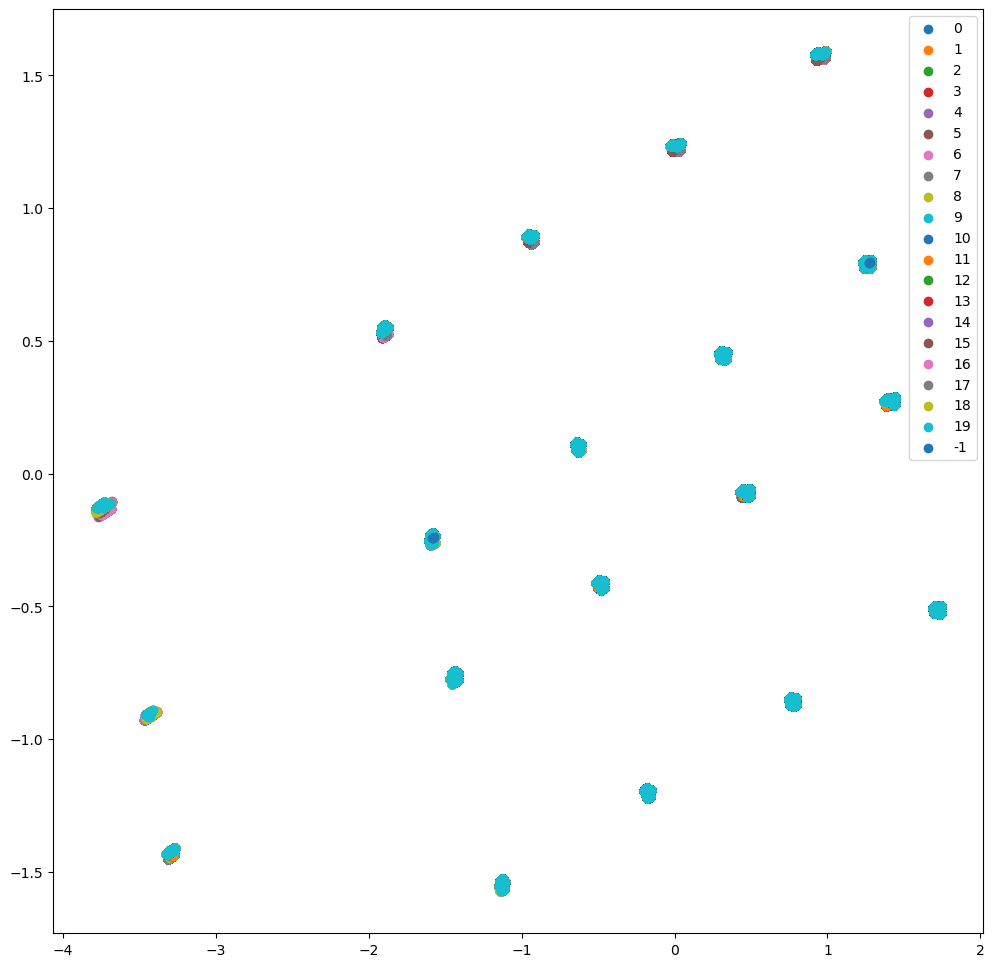

In [102]:
plt.figure(figsize=(12,12))
for i in list(set(preds)):
    
    plt.scatter(trans_data[preds==i,0],trans_data[preds==i,1],label=i)
plt.legend()
plt.show()

In [114]:
dist_of_preds = {}
for i in range(len(list(set(preds)))): 
    dist_of_preds[i] = sum(preds == i) / 11221346

In [115]:
def get_dbscan_samples(alpha):

    length = preds.shape[0]
    size_of_sample = round(alpha * length)
    

    sample = []
    
    for i in range(len(list(set(preds)))):

        sample = sample + list(random.sample(list(scores[preds==i]),round((size_of_sample*dist_of_preds[i]))))
        
    if len(sample) == size_of_sample:
        
        return sample
    elif len(sample)<size_of_sample:

        sample = sample + list(random.sample(list(scores), size_of_sample - len(sample)))
        return sample

    else:
        
        sample = sample[0:-(len(sample)-size_of_sample)]
        return sample

        


In [116]:
%%time
get_metrics(get_dbscan_samples, 0.3,)

CPU times: total: 35min 43s
Wall time: 37min 26s


(0.00021157882606165023, 0.00019052032635958783, 0.0, 3366404)

In [117]:
%%time
get_metrics(get_dbscan_samples, 0.1,)

CPU times: total: 19min 26s
Wall time: 20min 20s


(0.00042936578625901945, 0.00040463770695064685, 0.0, 1122135)

In [118]:
%%time
get_metrics(get_dbscan_samples, 0.01,)

CPU times: total: 10min 16s
Wall time: 10min 47s


(0.0013038639235297632, 0.0014110618967937548, 0.0, 112213)

In [119]:
%%time
get_metrics(get_dbscan_samples, 0.001,)

CPU times: total: 9min 57s
Wall time: 10min 25s


(0.004014477224231857, 0.004214148063044447, 0.0025, 11221)

In [120]:
%%time
get_metrics(get_dbscan_samples, 0.0001)

CPU times: total: 9min 29s
Wall time: 9min 56s


(0.012630131087786274, 0.01562264080746626, 0.02125, 1122)

In [121]:
%%time
get_metrics(get_dbscan_samples, 0.00005)

CPU times: total: 9min 28s
Wall time: 9min 54s


(0.017492046755412397, 0.020182872730961924, 0.025625, 561)

In [122]:
%%time
get_metrics(get_dbscan_samples, 0.00001)

CPU times: total: 9min 33s
Wall time: 9min 59s


(0.042580794397174285, 0.044159457560136506, 0.06625, 112)

In [123]:
%%time
get_metrics(get_dbscan_samples, 0.000005)

CPU times: total: 12min 13s
Wall time: 12min 47s


(0.058659738255778214, 0.05725749458929755, 0.085625, 56)

In [124]:
%%time
get_metrics(get_dbscan_samples, 0.000002)

CPU times: total: 11min 31s
Wall time: 12min 3s


(0.08796134786405041, 0.10247200227944876, 0.140625, 22)

In [125]:
%%time
get_metrics(get_dbscan_samples, 0.000001)

CPU times: total: 11min 12s
Wall time: 11min 41s


(0.14410215840099072, 0.1499106395736967, 0.19625, 11)

In [126]:
%%time
get_metrics(get_dbscan_samples, 0.0000005)

CPU times: total: 11min 33s
Wall time: 12min 4s


(0.18188345225907113, 0.23948981568590952, 0.27375, 6)

#### PCA + KMeans на сжатых данных 


In [77]:
scores = np.array(dataset['Балл'])

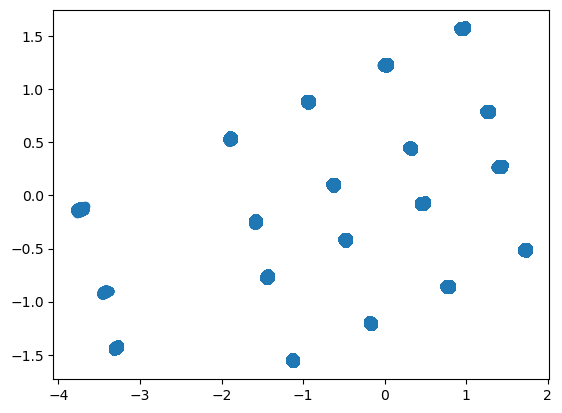

In [79]:
plt.scatter(trans_data[:,0],trans_data[:,1])

In [81]:
cluster_centers = np.array([
                           [-3.2,-1.5],
                           [-3.5, -0.8],
                           [-3.8,-0.2],
                           [-1.9,0.5],
                           [-1.5,-0.25],
                           [-1.4,-0.75],
                           [-1.1,-1.5],
                           [-0.9,0.75],
                           [-0.5,0],
                           [-0.3,-0.5],
                           [-0.1,-1.25],
                           [0,1.25],
                           [0.5,0.35],
                           [0.6,-0.25],
                           [0.9,-1],
                           [1,1.5],
                           [1.3,0.65],
                           [1.5,0.25],
                           [1.8,-0.5],
                           ])

In [83]:
kmeans = KMeans(n_clusters=19, random_state=0,init = cluster_centers).fit(trans_data)
preds = kmeans.predict(trans_data)

In [87]:
colors = ['black',
         'gray',
         'brown',
         'red',
         'darkorange',
         'tan',
         'olive',
         'yellow',
         'darkolivegreen',
         'darkseagreen',
         'teal',
         'dodgerblue',
         'navy',
         'indigo',
         'fuchsia',
         'deeppink',
         'peru',
         'slategray',
         'pink',]

C:\Users\isazo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


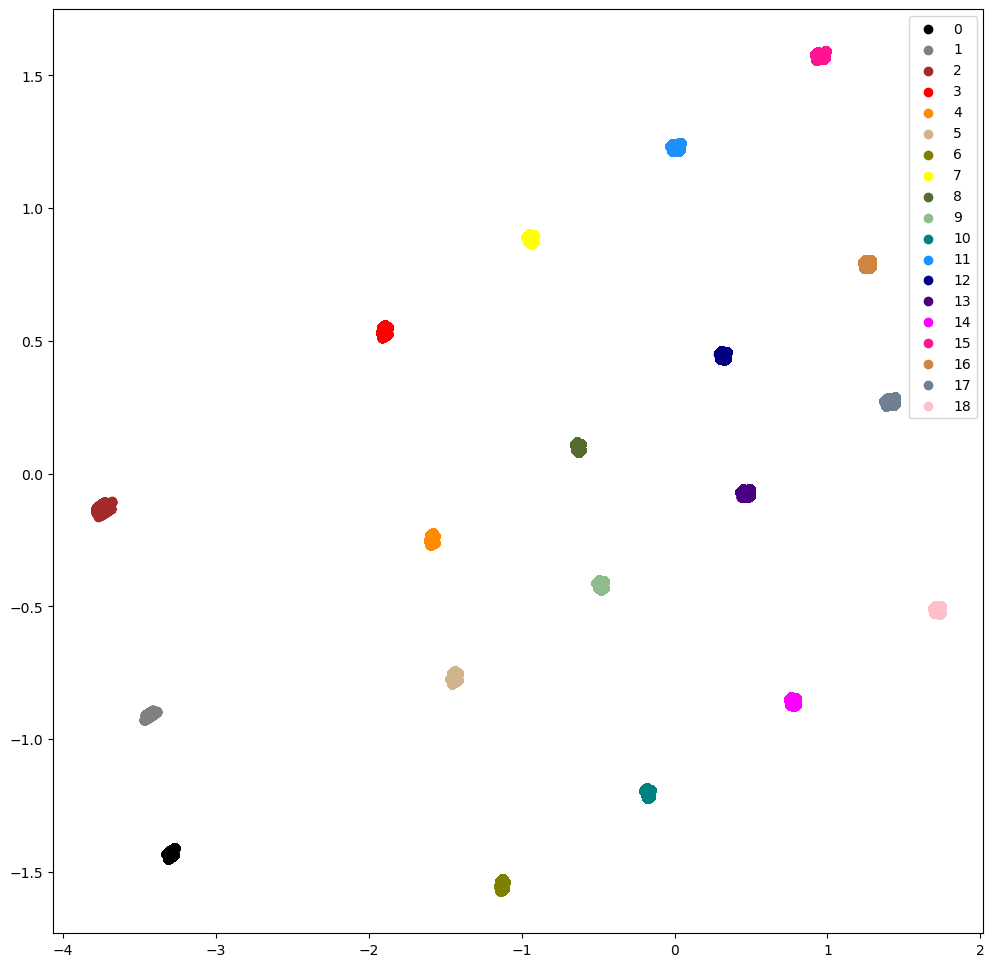

In [89]:
plt.figure(figsize=(12,12))
for i in list(set(preds)):
    
    plt.scatter(trans_data[preds==i,0],trans_data[preds==i,1],label=i,color=colors[i])
plt.legend()
plt.show()

In [112]:
dist_of_preds = {}
for i in range(len(list(set(preds)))): 
    dist_of_preds[i] = sum(preds == i) / 11221346

In [113]:
def get_k_means_samples(alpha):

    length = preds.shape[0]
    size_of_sample = round(alpha * length)
    

    sample = []
    
    for i in range(len(list(set(preds)))):

        sample = sample + list(random.sample(list(scores[preds==i]),round((size_of_sample*dist_of_preds[i]))))
        
    if len(sample) == size_of_sample:
        
        return sample
    elif len(sample)<size_of_sample:

        sample = sample + list(random.sample(list(scores), size_of_sample - len(sample)))
        return sample

    else:
        
        sample = sample[0:-(len(sample)-size_of_sample)]
        return sample

        


In [114]:
%%time 
get_metrics(get_k_means_samples, 0.3,)

CPU times: total: 31min 48s
Wall time: 33min 18s


(0.00016198486457790428, 0.00019152493272448724, 0.0, 3366404)

In [115]:
%%time
get_metrics(get_k_means_samples, 0.1,)

CPU times: total: 16min 30s
Wall time: 17min 15s


(0.0003573636306186623, 0.00038373101556563705, 0.0, 1122135)

In [116]:
%%time
get_metrics(get_k_means_samples, 0.01,)

CPU times: total: 9min 29s
Wall time: 9min 53s


(0.0010951180179685205, 0.0013455709664718463, 0.0, 112213)

In [117]:
%%time
get_metrics(get_k_means_samples, 0.001,)

CPU times: total: 8min 34s
Wall time: 8min 56s


(0.0036512002492387606, 0.004165578843548825, 0.00125, 11221)

In [118]:
%%time
get_metrics(get_k_means_samples, 0.0001)

CPU times: total: 8min 12s
Wall time: 8min 32s


(0.010636389999704074, 0.012978940181397704, 0.0203125, 1122)

In [119]:
%%time
get_metrics(get_k_means_samples, 0.00005)

CPU times: total: 8min 9s
Wall time: 8min 30s


(0.015325842252396988, 0.01574330143474818, 0.0275, 561)

In [120]:
%%time
get_metrics(get_k_means_samples, 0.00001)

CPU times: total: 8min 10s
Wall time: 8min 32s


(0.03170670548814225, 0.04104819137303089, 0.0584375, 112)

In [121]:
%%time
get_metrics(get_k_means_samples, 0.000005)

CPU times: total: 10min 31s
Wall time: 11min 1s


(0.04909208545527062, 0.05452078104036568, 0.0834375, 56)

In [122]:
%%time
get_metrics(get_k_means_samples, 0.000002)

CPU times: total: 8min 12s
Wall time: 8min 34s


(0.0799812952852525, 0.09893854547958535, 0.129375, 22)

In [123]:
%%time
get_metrics(get_k_means_samples, 0.000001)

CPU times: total: 10min 33s
Wall time: 11min 2s


(0.13876363236014083, 0.16356561730848768, 0.241875, 11)

In [124]:
%%time
get_metrics(get_k_means_samples, 0.0000005)

CPU times: total: 10min 48s
Wall time: 11min 15s


(0.17003165491681002, 0.2488879559739208, 0.2515625, 6)

#### PCA + KMeans на не сжатых данных 


In [167]:
#Считаем центры кластеров для каждого кластера на большой выборке
cluster_centers = []
for i in range(19):
    cluster_centers = cluster_centers + [data_for_clust[preds == i,:].mean(axis=0)]
cluster_centers = np.array(cluster_centers)

In [168]:
cluster_centers.shape

(19, 92)

In [171]:
kmeans = KMeans(n_clusters=19, random_state=0,init = cluster_centers).fit(data_for_clust)
preds = kmeans.predict(data_for_clust)

C:\Users\isazo\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


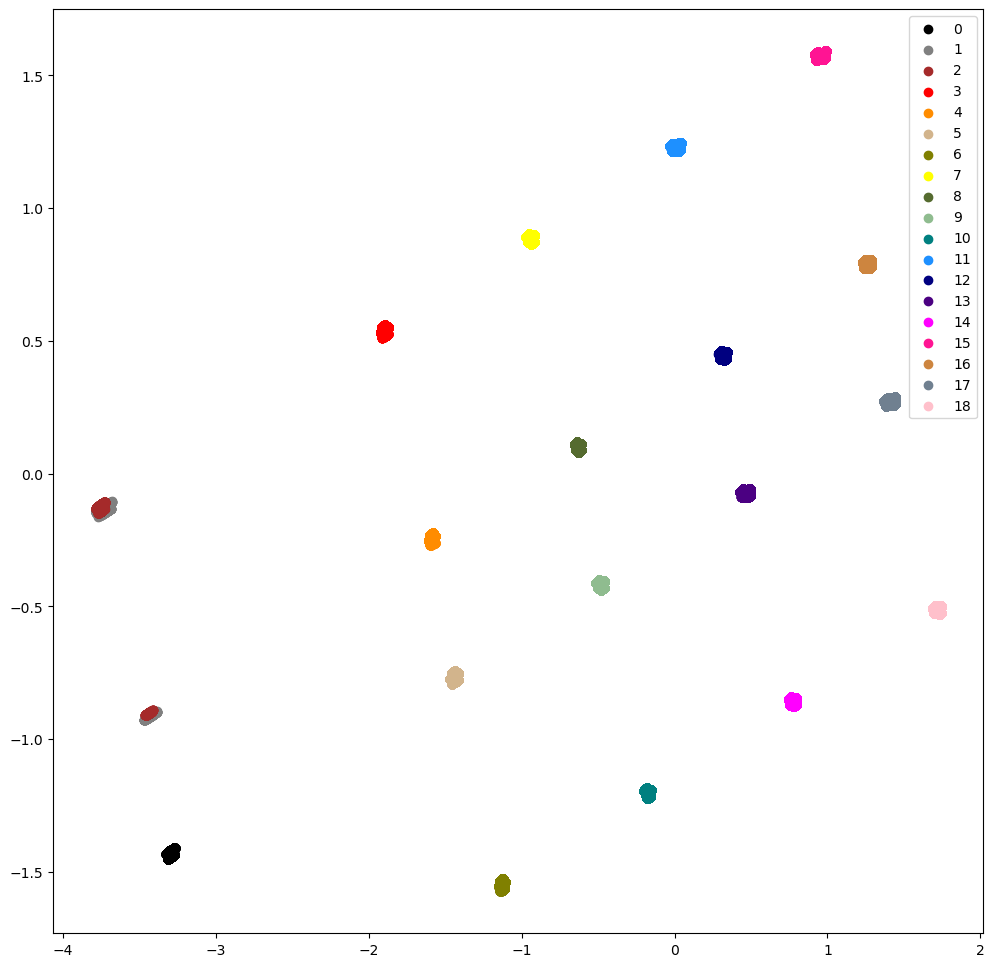

In [172]:
plt.figure(figsize=(12,12))
for i in list(set(preds)):
    
    plt.scatter(trans_data[preds==i,0],trans_data[preds==i,1],label=i,color=colors[i])
plt.legend()
plt.show()

In [173]:
dist_of_preds = {}
for i in range(len(list(set(preds)))): 
    dist_of_preds[i] = sum(preds == i) / 11221346

In [174]:
%%time 
get_metrics(get_k_means_samples, 0.3,)

CPU times: total: 31min 5s
Wall time: 32min 31s


(0.00016619169647146936, 0.00017152871783176482, 0.0, 3366404)

In [224]:
%%time
get_metrics(get_k_means_samples, 0.1,)

CPU times: total: 16min 38s
Wall time: 17min 24s


(0.00033492152745108196, 0.0004358014900424678, 0.0, 1122135)

In [225]:
%%time
get_metrics(get_k_means_samples, 0.01,)

CPU times: total: 9min 39s
Wall time: 10min 4s


(0.0011443715919201847, 0.001335846572123165, 0.0, 112213)

In [226]:
%%time
get_metrics(get_k_means_samples, 0.001,)

CPU times: total: 8min 46s
Wall time: 9min 7s


(0.002894593681420635, 0.004025680100258956, 0.003125, 11221)

In [227]:
%%time
get_metrics(get_k_means_samples, 0.0001)

CPU times: total: 8min 25s
Wall time: 8min 45s


(0.012520898475703073, 0.01289382293877348, 0.019375, 1122)

In [228]:
%%time
get_metrics(get_k_means_samples, 0.00005)

CPU times: total: 8min
Wall time: 8min 20s


(0.01600477936534445, 0.0175400636761105, 0.0275, 561)

In [229]:
%%time
get_metrics(get_k_means_samples, 0.00001)

CPU times: total: 7min 58s
Wall time: 8min 18s


(0.03278711352817822, 0.0473889264224745, 0.0503125, 112)

In [230]:
%%time
get_metrics(get_k_means_samples, 0.000005)

CPU times: total: 10min 19s
Wall time: 10min 44s


(0.046804008327915946, 0.05679896594036803, 0.0878125, 56)

In [231]:
%%time
get_metrics(get_k_means_samples, 0.000002)

CPU times: total: 8min 22s
Wall time: 8min 44s


(0.0791713560801965, 0.0888707628133219, 0.139375, 22)

In [232]:
%%time
get_metrics(get_k_means_samples, 0.000001)

CPU times: total: 10min 50s
Wall time: 11min 16s


(0.10914819959951312, 0.14466349975060067, 0.19625, 11)

In [233]:
%%time
get_metrics(get_k_means_samples, 0.0000005)

CPU times: total: 10min 51s
Wall time: 11min 21s


(0.16681726516910853, 0.2742890007729354, 0.2884375, 6)

##### Перебор количества кластеров 

In [235]:
n_clusters = [i for i in range(19,41,1)]

In [241]:
dict_of_clusts = []
for i in n_clusters:
    kmeans = KMeans(n_clusters=i, random_state=0).fit(data_for_clust)
    preds = kmeans.predict(data_for_clust)
    dist_of_preds = {}
    for k in range(len(list(set(preds)))): 
        dist_of_preds[k] = sum(preds == k) / 11221346

    print(f'При n_clusters = {i}')
    get = get_metrics(get_k_means_samples, 0.000005)
    print(get)
    dict_of_clusts.append([i,kmeans, get,])

При n_clusters = 19
(0.025067980915264066, 0.03685926601504489, 0.0509375, 56)
При n_clusters = 20
(0.029911505253558072, 0.037850775554858704, 0.046875, 56)
При n_clusters = 21
(0.023116320310102783, 0.033111085813452824, 0.0446875, 56)
При n_clusters = 22
(0.020224717206621414, 0.03583747058511546, 0.0396875, 56)
При n_clusters = 23
(0.01962363662992447, 0.03314491985919826, 0.0403125, 56)
При n_clusters = 24
(0.019376282122954367, 0.03672264568369496, 0.0334375, 56)
При n_clusters = 25
(0.020575123969007177, 0.03463568178807436, 0.031875, 56)
При n_clusters = 26
(0.020388690099792134, 0.03478451484371345, 0.0325, 56)
При n_clusters = 27
(0.017691209712423765, 0.037101083467024794, 0.03625, 56)
При n_clusters = 28
(0.027037993586564158, 0.033336067702122316, 0.0459375, 56)
При n_clusters = 29
(0.02138501508561653, 0.031924395369387674, 0.0415625, 56)
При n_clusters = 30
(0.01880325861837866, 0.0297960296198133, 0.03625, 56)
При n_clusters = 31
(0.020419805849603217, 0.028730267266592

In [275]:
ms = 100
for i in dict_of_clusts:
    if i[2][0]<ms:
        ms = i[2][0]
        best = i
print(best)
#Лучшее значение мат ожид при количестве кластеров = 27

[27, KMeans(n_clusters=27, random_state=0), (0.017691209712423765, 0.037101083467024794, 0.03625, 56)]


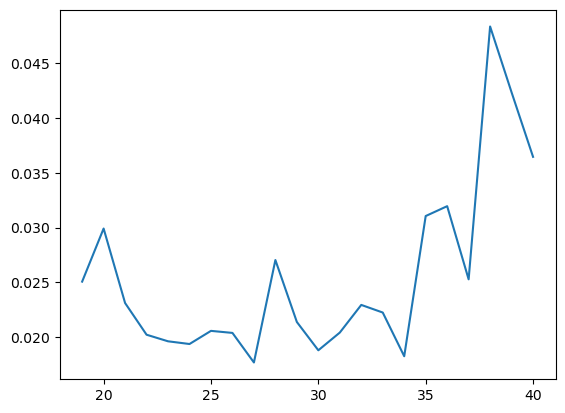

In [289]:
plt.plot([i[0] for i in dict_of_clusts], 
         [i[2][0] for i in dict_of_clusts])

In [297]:
ms = 100
for i in dict_of_clusts:
    if i[2][1]<ms:
        ms = i[2][1]
        best = i
print(best)
#Лучшее значение стд при количестве кластеров = 40

[40, KMeans(n_clusters=40, random_state=0), (0.03645312631570627, 0.023513232602670634, 0.044375, 56)]


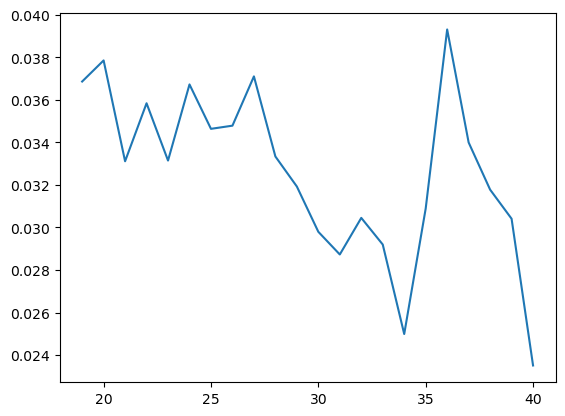

In [293]:
plt.plot([i[0] for i in dict_of_clusts], 
         [i[2][1] for i in dict_of_clusts])

In [303]:
ms = 100
for i in dict_of_clusts:
    if i[2][1]<ms:
        ms = i[2][2]
        best = i
print(best)
#Лучшее значение медианы при количестве кластеров = 40

[40, KMeans(n_clusters=40, random_state=0), (0.03645312631570627, 0.023513232602670634, 0.044375, 56)]


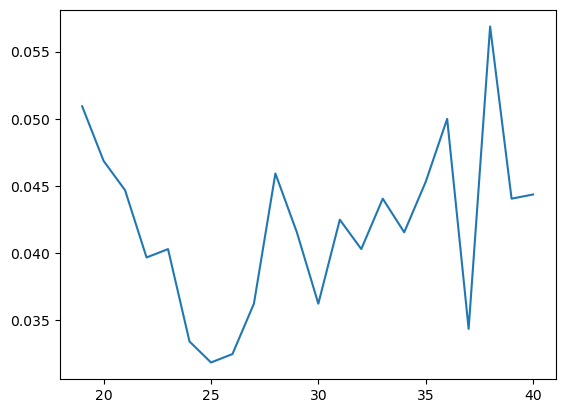

In [295]:
plt.plot([i[0] for i in dict_of_clusts], 
         [i[2][2] for i in dict_of_clusts])